In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
data=pd.read_csv("Gender_voice.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


In [10]:
data["label"]=data["label"].replace({"male":0,"female":1}) #replacing  values in the column for sex rappresentation in int

In [87]:
data.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0


In [11]:
from scipy.stats import zscore
dataz=data.copy()
for col in list(dataz.columns):
    dataz[col] = zscore(dataz[col])
dataz

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,...,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772,-1.0
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,...,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103,-1.0
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,...,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344,-1.0
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,...,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286,-1.0
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,...,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,-1.638842,1.658182,-0.877839,-1.873163,-0.999378,1.579141,-0.325020,-0.221916,1.507749,1.999883,...,-1.638842,1.237885,2.444087,0.114817,0.007024,-0.708404,-0.237556,-0.224892,-0.098989,1.0
3164,-2.162452,1.927682,-2.994482,-2.008095,-0.840021,1.820721,-0.577009,-0.252503,1.458418,1.697831,...,-2.162452,1.429532,-0.124536,0.565959,0.153573,-0.214641,-0.388453,-0.384717,0.871981,1.0
3165,-1.298773,2.322724,-0.051973,-2.199039,-0.017123,2.492666,-0.298044,-0.222108,1.150198,1.385857,...,-1.298773,2.077781,0.140728,0.565959,-0.637833,-0.708404,-0.599266,-0.586717,0.175887,1.0
3166,-1.245202,2.012196,-0.017728,-1.991852,-0.204021,2.153653,-0.365367,-0.231123,1.229850,1.505711,...,-1.245202,0.915445,-0.120678,-0.294030,-0.072080,-0.708404,-0.412863,-0.400255,1.149161,1.0


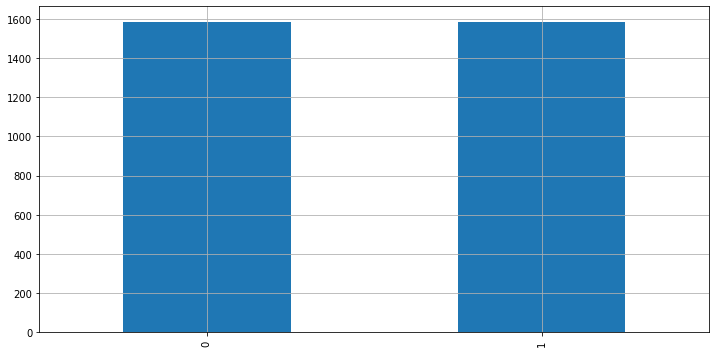

In [74]:
data['label'].value_counts().sort_index().plot.bar(figsize=(12,6))
plt.grid()
plt.show()

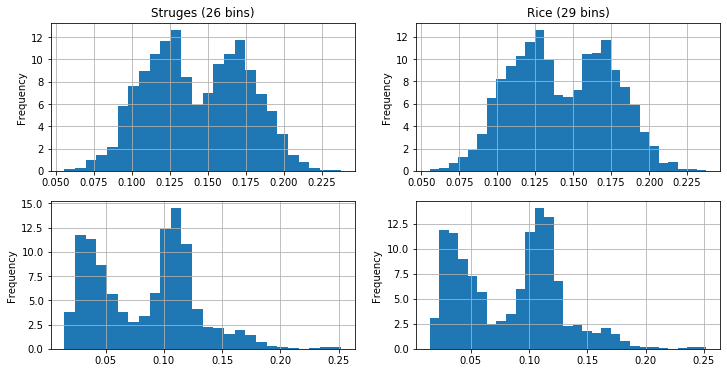

In [122]:
bins_struges=int(3.3*np.log(len(data['meanfun'])))
bins_rice=int(2*len(data['meanfun'])**(1/3))
plt.subplot(2,2,1)
plt.title('Struges ({} bins)'.format(bins_struges))
data['meanfun'].plot.hist(figsize=(12,6), density='True', bins=bins_struges)
plt.grid()
plt.subplot(2,2,2)
plt.title('Rice ({} bins)'.format(bins_rice))
data['meanfun'].plot.hist(figsize=(12,6), density='True', bins=bins_rice)
plt.grid()
plt.subplot(2,2,3)
data['IQR'].plot.hist(figsize=(12,6), density='True', bins=bins_struges)
plt.grid()
plt.subplot(2,2,4)
data['IQR'].plot.hist(figsize=(12,6), density='True', bins=bins_rice)
plt.grid()
plt.show()

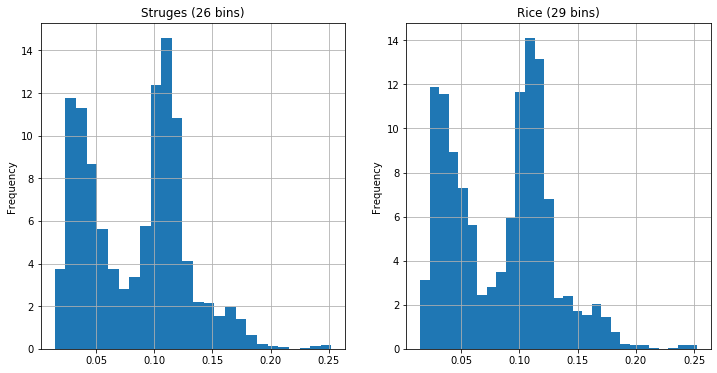

In [82]:
plt.subplot(1,2,1)
plt.title('Struges ({} bins)'.format(bins_struges))
data['IQR'].plot.hist(figsize=(12,6), density='True', bins=bins_struges)
plt.grid()
plt.subplot(1,2,2)
plt.title('Rice ({} bins)'.format(bins_rice))
data['IQR'].plot.hist(figsize=(12,6), density='True', bins=bins_rice)
plt.grid()
plt.show()

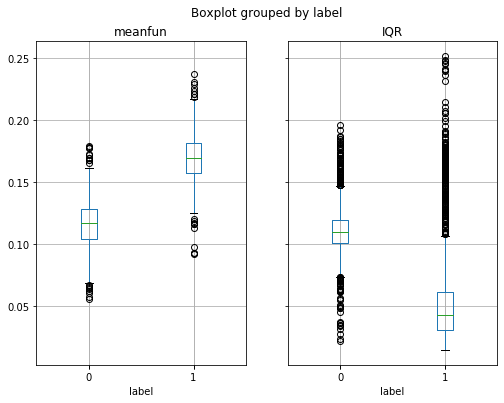

In [121]:
data.boxplot(by='label',column=['meanfun',"IQR"], figsize=(8,6))
plt.show()

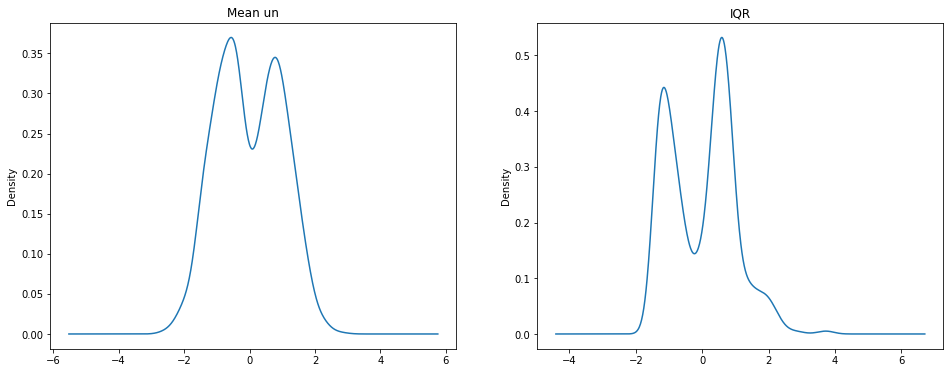

In [120]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title('Mean un')
dataz['meanfun'].plot.density()
plt.subplot(122)
plt.title('IQR')
dataz['IQR'].plot.density()
plt.show()

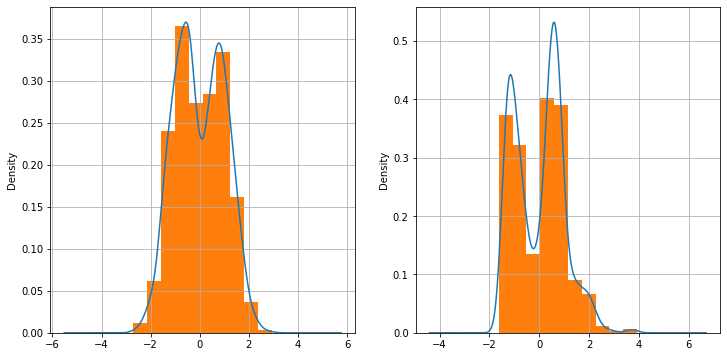

In [118]:
plt.figure(figsize=(16,10))
plt.subplot(121)
a=dataz['meanfun'].plot.density(figsize=(12,6))
plt.hist(dataz['meanfun'], density=True)
plt.grid()
plt.subplot(122)
b=dataz['IQR'].plot.density(figsize=(12,6))
plt.hist(dataz['IQR'], density=True)
plt.grid()
plt.show()

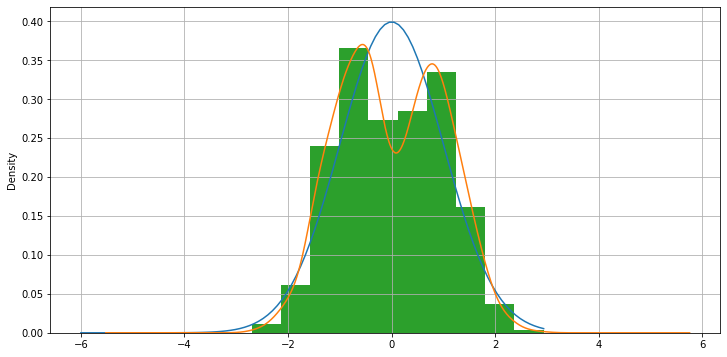

In [117]:
from scipy.stats import norm
mu = dataz['meanfun'].mean()
sigma = dataz['meanfun'].std()
g = norm(mu,sigma)
x=np.linspace(-6,dataz['meanfun'].max(),100)
plt.figure(figsize=(16,10))
plt.plot(x,g.pdf(x))
dataz['meanfun'].plot.density(figsize=(12,6))
plt.hist(dataz['meanfun'], density=True)
plt.grid()

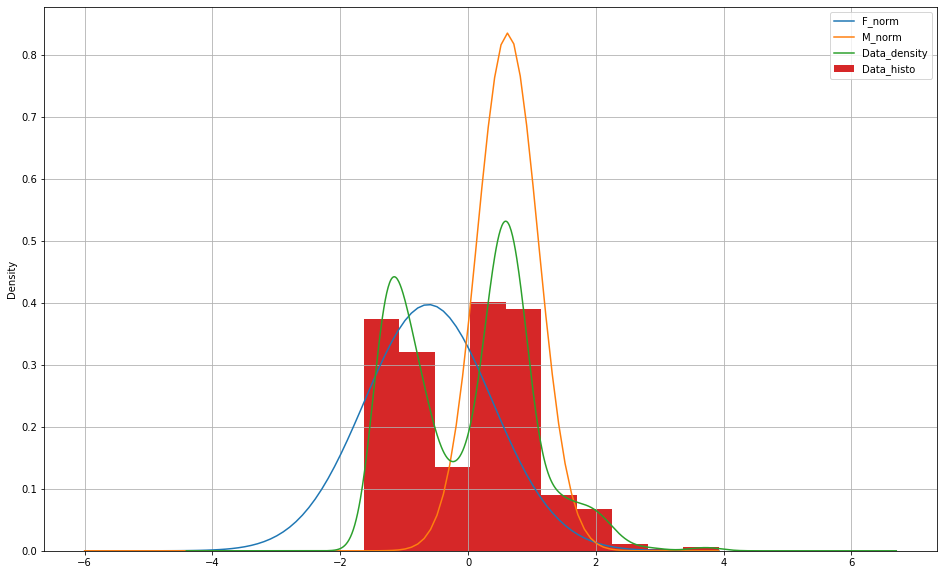

In [98]:
mum = dataz[dataz["label"]==-1]['IQR'].mean()
sigmam = dataz[dataz["label"]==-1]['IQR'].std()
muf = dataz[dataz["label"]==1]['IQR'].mean()
sigmaf = dataz[dataz["label"]==1]['IQR'].std()
gf = norm(muf,sigmaf)
gm = norm(mum,sigmam)
x=np.linspace(-6,dataz['IQR'].max(),100)
plt.figure(figsize=(16,10))
plt.plot(x,gf.pdf(x))
plt.plot(x,gm.pdf(x))
dataz['IQR'].plot.density()
plt.hist(dataz['IQR'], density=True)
plt.grid()
plt.legend(['F_norm','M_norm','Data_density','Data_histo'])
plt.show()

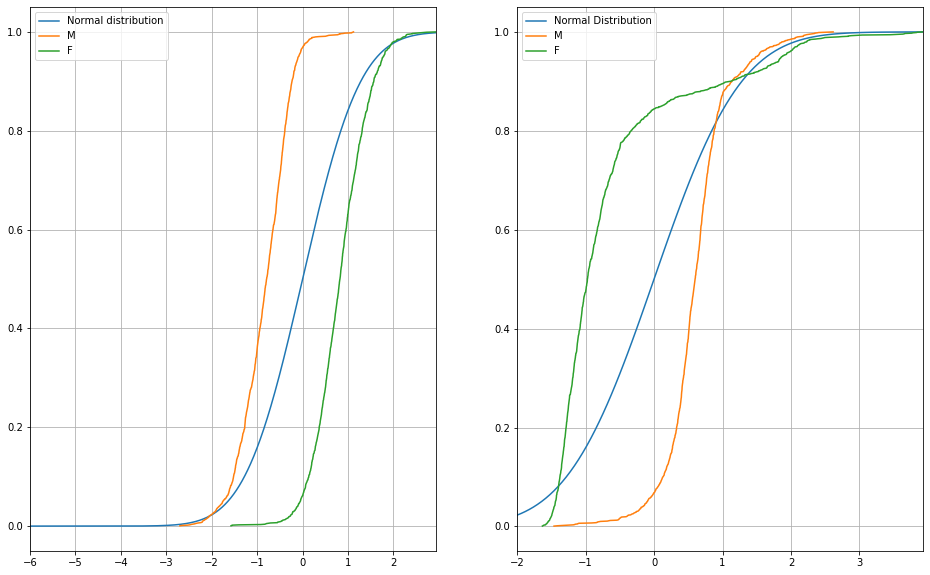

In [114]:
x=np.linspace(-6,dataz['meanfun'].max(),1000)
plt.figure(figsize=(16,10))
plt.subplot(121)
plt.plot(x,g.cdf(x))
dataz[dataz['label']==-1]['meanfun'].value_counts(normalize="true").sort_index().cumsum().plot()
dataz[dataz['label']==1]['meanfun'].value_counts(normalize="true").sort_index().cumsum().plot()
plt.grid()
plt.legend(["Normal distribution",'M','F'])

mui=dataz["IQR"].mean()
sdi=dataz["IQR"].std()
gi=norm(mui,sdi)
x=np.linspace(-2,dataz["IQR"].max(),100)
plt.subplot(122)
plt.plot(x,gi.cdf(x))
dataz[dataz['label']==-1]['IQR'].value_counts(normalize="true").sort_index().cumsum().plot()
dataz[dataz['label']==1]['IQR'].value_counts(normalize="true").sort_index().cumsum().plot()
plt.grid()
plt.legend(["Normal Distribution",'M','F'])

plt.show()

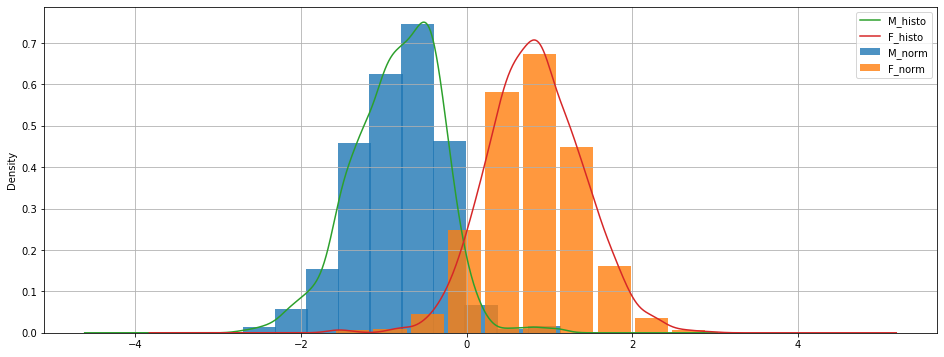

In [115]:
dataz.groupby('label')['meanfun'].plot.hist(width=0.4, alpha=0.8, density=True, figsize=(16,6))
dataz.groupby('label')['meanfun'].plot.density()
plt.legend(['M_histo','F_histo','M_norm','F_norm'])
plt.grid()
plt.show()

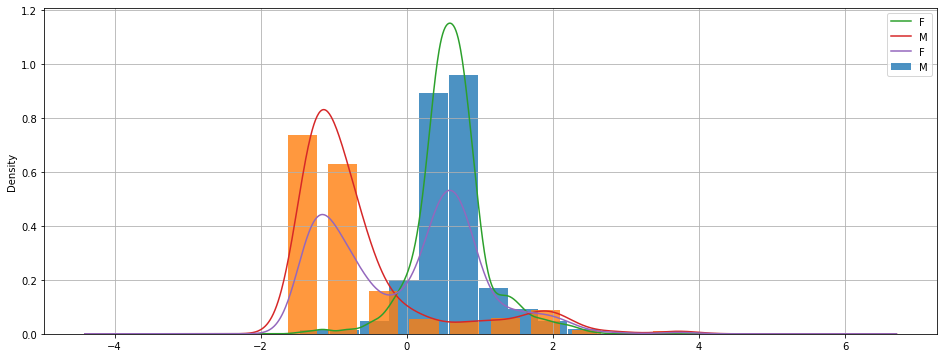

In [97]:
dataz.groupby('label')['IQR'].plot.hist(width=0.4, alpha=0.8, density=True, figsize=(16,6))
dataz.groupby('label')['IQR'].plot.density()
dataz["IQR"].plot.density()
plt.legend(['F','M','F'])
plt.grid()
plt.show()

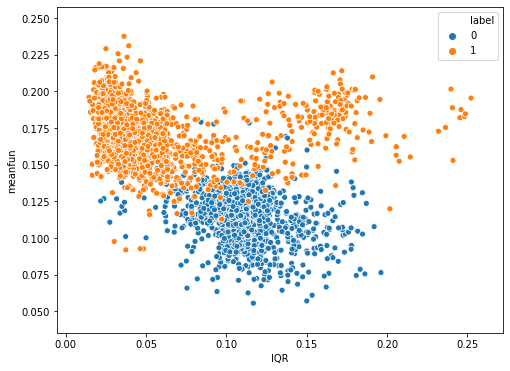

In [116]:
plt.figure(figsize=(8,6))
sns.scatterplot(data['IQR'], data['meanfun'], hue=data['label'])
plt.show()